# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
# import numpy as np
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# X, y = mnist['data'], mnist['target']

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Solution found on https://stackoverflow.com/questions/54365045/scikit-learn-cannot-load-mnist-original-dataset-using-fetch-openml-in-python

### Now take a look at the shapes of the X and y matricies 

In [3]:
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (70000, 784)
y.shape: (70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X[36000,:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [5]:
# Import libraries
import matplotlib.pyplot as plt
%matplotlib inline

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
selection = X[36000,:].reshape(28,28)
selection
# plt.imshow(selection, cmap = "binary", interpolation="nearest")

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:
y_train_5 = np.where(y_train =="5",True, False)
y_test_5 = np.where(y_test =="5",True, False)

In [9]:
print("X.shape:", X_train.shape)
print("y.shape:", y_train_5.shape)

X.shape: (60000, 784)
y.shape: (60000,)



### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=4000)
model = model.fit(X_train, y_train_5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Does the classifier predict correctly the 36000th digit we picked before?

In [11]:
model.predict(X[36000].reshape(1, -1))

array([False])

In [12]:
y_pred_5 = model.predict(X_test)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [14]:
y_pred_never_5 = never_5_clf.predict(y_test_5)
y_pred_never_5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [15]:
# Import libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [16]:
# Confusion Matrix for y_pred
matrix = confusion_matrix(y_test_5, y_pred_5)
print(matrix)

# Precision recall for y_pred
precision_5 = precision_score(y_test_5, y_pred_5)
recall_5 = recall_score(y_test_5, y_pred_5)
f1_score_5 = f1_score(y_test_5, y_pred_5)

print("\nPrecision y_pred:",precision_5,"\nRecall y_pred:",recall_5,"\nF1_score y_pred:",f1_score_5)

[[9025   83]
 [ 145  747]]

Precision y_pred: 0.9 
Recall y_pred: 0.8374439461883408 
F1_score y_pred: 0.867595818815331


In [17]:
# Confusion Matrix for y_pred_never_5
matrix = confusion_matrix(y_test_5, y_pred_never_5)
print(matrix)

# Precision recall for y_pred_never_5
precision_never_5 = precision_score(y_test_5, y_pred_never_5)
recall_never_5 = recall_score(y_test_5, y_pred_never_5)
f1_score_never_5 = f1_score(y_test_5, y_pred_never_5)

print("\nPrecision y_pred:",precision_never_5,"\nRecall y_pred:",recall_never_5,"\nF1_score y_pred:",f1_score_never_5)

[[9108    0]
 [ 892    0]]

Precision y_pred: 0.0 
Recall y_pred: 0.0 
F1_score y_pred: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [18]:
"""
The first model had a higher precision score, recall and f1 score so I would choose the 
first model. The second model always predicts True Negatives and False Negatives 
but never False Positives or True Positives.
"""

'\nThe first model had a higher precision score, recall and f1 score so I would choose the \nfirst model. The second model always predicts True Negatives and False Negatives \nbut never False Positives or True Positives.\n'

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

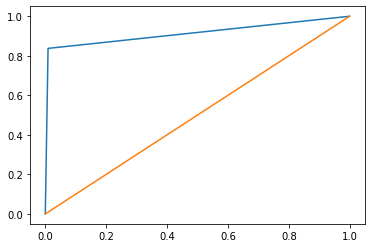

In [23]:
from sklearn.metrics import roc_curve

# y_pred_proba_5 = model.predict_proba(y_pred_5)[::,1]
# y_pred_proba_never_5 = model.predict_proba(y_pred_never_5)[::,1]

# fpr, tpr, threshold = roc_curve(y_test_5, y_pred_proba_5)
# fpr2, tpr2, threshold2 = roc_curve(y_test_5, y_pred_proba_never_5)

fpr, tpr, threshold = roc_curve(y_test_5, y_pred_5)
fpr2, tpr2, threshold2 = roc_curve(y_test_5, y_pred_never_5)

plt.plot(fpr,tpr)
plt.plot(fpr2,tpr2)

### Now find the roc_auc_score for each. 

In [27]:
from sklearn import metrics

roc_auc_score_5 = metrics.roc_auc_score(y_test_5, y_pred_5)
roc_auc_score_never_5 = metrics.roc_auc_score(y_test_5, y_pred_never_5)

print("roc_auc_score_5:",roc_auc_score_5,"\nroc_auc_score_never_5:",roc_auc_score_never_5)

roc_auc_score_5: 0.9141655391899105 
roc_auc_score_never_5: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
"""
The higher the score, the better the model is able to distinguish between 2 classes. 
0.5 is the worst and basically menas that it is randomly guessing.
"""